In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

import re
import string

In [2]:
data_fake = pd.read_csv("D:/Pinnacle/New_folder/FakeNewsDetection/Fake.csv")
data_true = pd.read_csv("D:/Pinnacle/New_folder/FakeNewsDetection/True.csv")

In [3]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# DATA FORMULATION

In [5]:
data_fake['class']=0
data_true['class']=1

In [6]:
data_fake.shape ,data_true.shape

((23481, 5), (21417, 5))

In [7]:
data_fake_manual_testing = data_fake.tail(10)

for i in range(23480,23470,-1):
    data_fake.drop([i],axis=0,inplace=True)

data_true_manual_testing = data_true.tail(10)

for i in range(21416,21406,-1):
    data_true.drop([i],axis=0,inplace=True)

In [8]:
data_fake.shape ,data_true.shape

((23471, 5), (21407, 5))

In [9]:
# data_fake_manual_testing['class']=0
# data_true_manual_testing['class']=1

In [10]:
# data_fake_manual_testing.head()

In [11]:
# data_true_manual_testing.head()

In [12]:
data_manual_testing=pd.concat([data_fake_manual_testing,data_true_manual_testing],axis=0)
# data_manual_testing.to_csv("manual_testing.csv")
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(5)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [14]:
data = data_merge.drop(['title', 'subject', 'date'],axis=1)
data

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21402,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,1
21403,WASHINGTON (Reuters) - The United States sugge...,1
21404,WASHINGTON (Reuters) - The United States has d...,1
21405,ISLAMABAD (Reuters) - Outlining a new strategy...,1


## Describe data: Examine the data and document its surface properties like data format, number of records, or field identities.

In [15]:
data.describe()

,class
count,44878.000000
mean,0.477004
std,0.499476
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [16]:
data.shape

(44878, 2)

In [17]:
data.columns

Index(['text', 'class'], dtype='object')

In [18]:
data.info

<bound method DataFrame.info of                                                     text  class
0      Donald Trump just couldn t wish all Americans ...      0
1      House Intelligence Committee Chairman Devin Nu...      0
2      On Friday, it was revealed that former Milwauk...      0
3      On Christmas day, Donald Trump announced that ...      0
4      Pope Francis used his annual Christmas Day mes...      0
...                                                  ...    ...
21402  ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...      1
21403  WASHINGTON (Reuters) - The United States sugge...      1
21404  WASHINGTON (Reuters) - The United States has d...      1
21405  ISLAMABAD (Reuters) - Outlining a new strategy...      1
21406  GENEVA (Reuters) - North Korea and the United ...      1

[44878 rows x 2 columns]>

In [19]:
data.describe()

,class
count,44878.000000
mean,0.477004
std,0.499476
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [20]:
# random shuffling
data=data.sample(frac=1)
data

,text,class
20991,LONDON (Reuters) - British police arrested fou...,1
18452,Rep. Trey Gowdy was full of sarcasm (rightfull...,0
13098,,0
12674,JERUSALEM/GAZA (Reuters) - At least two people...,1
1350,WASHINGTON (Reuters) - Democrat Dianne Feinste...,1
...,...,...
16310,NAIROBI (Reuters) - Kenya s President Uhuru Ke...,1
9851,WASHINGTON (Reuters) - A U.S. congressional co...,1
1277,MEXICO CITY (Reuters) - The leaders of Mexico ...,1
21033,Thank you Angela Merkel German security servic...,0


In [21]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [22]:
data.columns

Index(['text', 'class'], dtype='object')

In [23]:
data.reset_index(inplace=True)
data.columns

Index(['index', 'text', 'class'], dtype='object')

In [24]:
data.drop(['index'],axis=1,inplace=True)
data

,text,class
0,LONDON (Reuters) - British police arrested fou...,1
1,Rep. Trey Gowdy was full of sarcasm (rightfull...,0
2,,0
3,JERUSALEM/GAZA (Reuters) - At least two people...,1
4,WASHINGTON (Reuters) - Democrat Dianne Feinste...,1
...,...,...
44873,NAIROBI (Reuters) - Kenya s President Uhuru Ke...,1
44874,WASHINGTON (Reuters) - A U.S. congressional co...,1
44875,MEXICO CITY (Reuters) - The leaders of Mexico ...,1
44876,Thank you Angela Merkel German security servic...,0


In [25]:
data.columns

Index(['text', 'class'], dtype='object')

# Data Vizualization

### Explore data: Dig deeper into the data. Query it, visualize it, and identify relationships among the data.

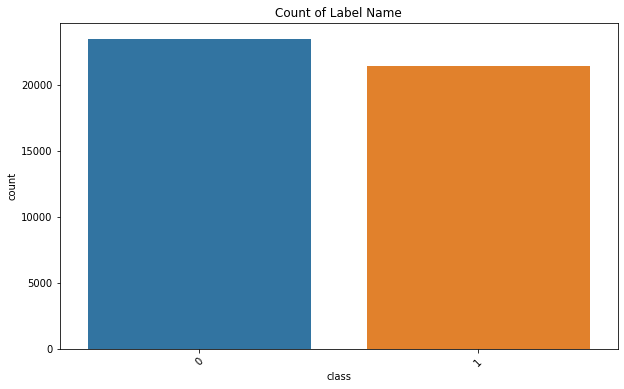

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='class')
plt.title('Count of Label Name')
plt.xticks(rotation=45)
plt.show()

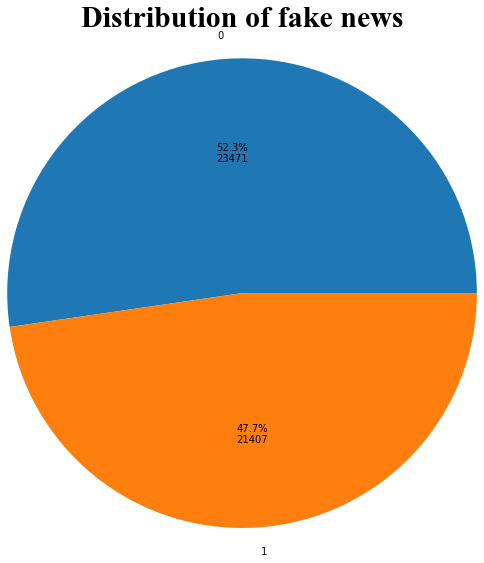

In [27]:
total = data['class'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.title('Distribution of fake news',y=1.7, fontname="Times New Roman", size=30,fontweight="bold")
plt.pie(data['class'].value_counts().values, labels=data['class'].value_counts().index, autopct=fmt,radius=2.7)
# plt.figure(figsize=(20, 6))
plt.show()

# WordCloud

# wordcloud for fake news

In [28]:
from wordcloud import WordCloud

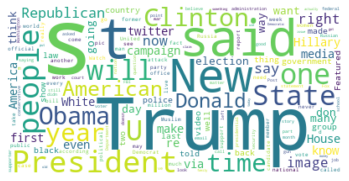

In [29]:
text = " ".join(data_fake.text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

word_cloud.to_file('fake_news_word_cloud.png') 

# wordcloud for true news

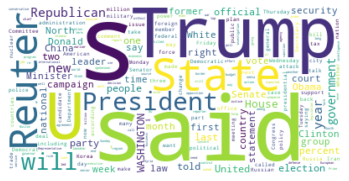

In [30]:
text = " ".join(data_true.text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
word_cloud.to_file('true_news_word_cloud.png') 

# wordcloud of merged and clean data

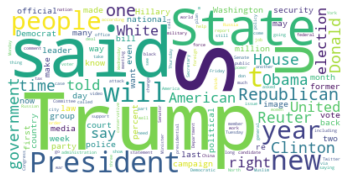

In [31]:
text = " ".join(data.text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
word_cloud.to_file('merged_news_word_cloud.png') 

In [32]:

def wordopt(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [33]:
data['text']=data['text'].apply(wordopt)

# splitting the data

In [34]:
x =data['text']
y =data['class']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

# vectorization using tfidf

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization=TfidfVectorizer()

In [37]:
xv_train = vectorization.fit_transform(x_train)
xv_test =  vectorization.transform(x_test)

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)


LogisticRegression()

In [39]:
LR.score(xv_test,y_test)

0.9877896613190731

In [40]:
pred_lr=LR.predict(xv_test)

In [41]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5774
           1       0.99      0.99      0.99      5446

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [42]:
# print confusion matrix
cm = confusion_matrix(y_test, pred_lr)

print('Confusion matrix\n')

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix


True Positives(TP) =  5710

True Negatives(TN) =  5373

False Positives(FP) =  64

False Negatives(FN) =  73


# ROC AUC Curve

In [43]:
# computing FPR & TPR & Threshold
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, pred_lr)

In [44]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, pred_lr))

roc_auc_score for Logistic Regression:  0.9877557480625662


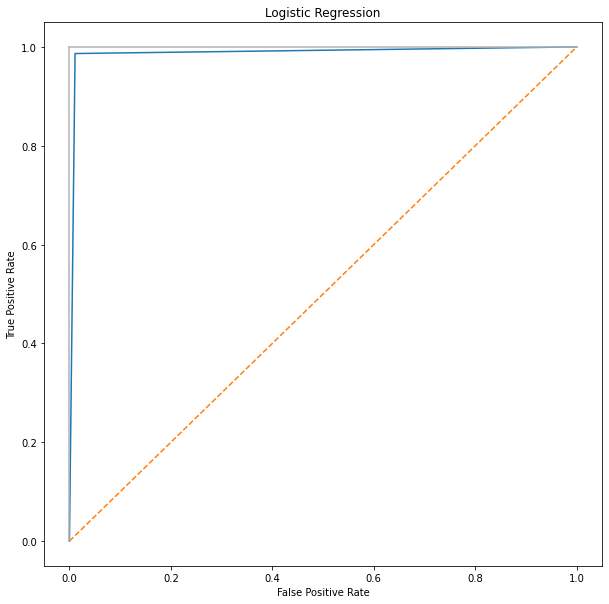

In [45]:
plt.subplots(1, figsize=(10,10))
plt.title('Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Hyper perameter tuning LR

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver' : ['lbfgs',],
    'max_iter' : [100, 1000]
    }
]



In [47]:
clf_lr = GridSearchCV(LR, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [48]:
best_clf_lr = clf_lr.fit(xv_train,y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
42 fits failed out of a total of 84.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logisti

In [49]:
best_clf_lr.best_estimator_

LogisticRegression(C=1000)

In [50]:
print("Accuracy of the logistic regression model : {:.2f}",format(best_clf_lr.score(xv_test,y_test)))

Accuracy of the logistic regression model : {:.2f} 0.9957219251336898


# Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [52]:
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [53]:
pred_dt = DT.predict(xv_test)

In [54]:
DT.score(xv_test,y_test)

0.9959893048128342

In [55]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5774
           1       1.00      0.99      1.00      5446

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [56]:
# print confusion matrix
cm = confusion_matrix(y_test, pred_dt)

print('Confusion matrix\n')

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix


True Positives(TP) =  5758

True Negatives(TN) =  5417

False Positives(FP) =  16

False Negatives(FN) =  29


# ROC AUC Curve

In [57]:
# computing FPR & TPR & Threshold
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, pred_dt)

In [58]:
print('roc_auc_score for Decision Tree: ', roc_auc_score(y_test, pred_dt))

roc_auc_score for Decision Tree:  0.9959519741070849


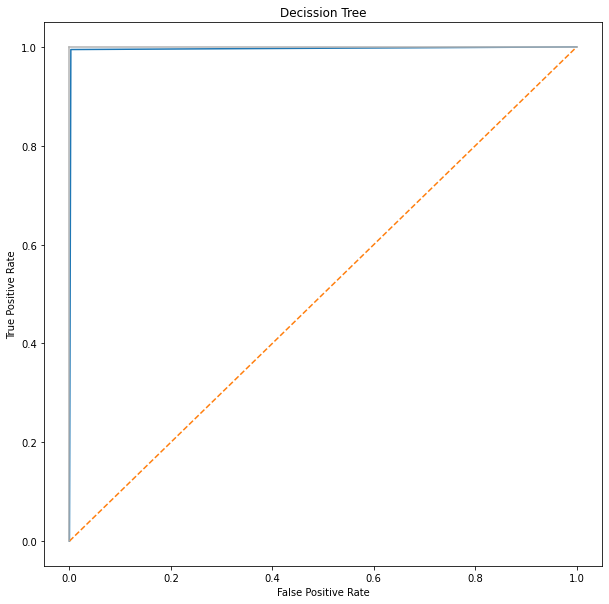

In [59]:
plt.subplots(1, figsize=(10,10))
plt.title('Decission Tree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Hyper Perameter Tuning In Decision Tree

In [60]:
DT.tree_.max_depth

61

In [61]:
# for max_d in range(1,21):
#     model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
#     model.fit(xv_train, y_train)
#     print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(xv_train, y_train))
#     print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(xv_test,y_test))
#     print('')

By carefully looking at the results, we can find the max_depth value where the validation accuracy starts decreasing, and the training accuracy starts mounting inordinately.
with max_depth = 3 but since it not compatible with other hyperperameter I have done is using hit and trial method.

In [62]:
clf_dt = DecisionTreeClassifier(random_state=82, max_depth=61,max_leaf_nodes=30,min_samples_split=20)

In [63]:
best_clf_dt = clf_dt.fit(xv_train,y_train)

In [64]:
print("Accuracy of the Decision Tree model : {:.2f}",format(best_clf_dt.score(xv_test,y_test)))

Accuracy of the Decision Tree model : {:.2f} 0.9959001782531194


[Text(255.50526315789475, 211.04470588235293, 'X[70441] <= 0.005\ngini = 0.499\nsamples = 33658\nvalue = [17697, 15961]'),
 Text(211.45263157894738, 198.25411764705882, 'X[94489] <= 0.479\ngini = 0.004\nsamples = 17509\nvalue = [17474, 35]'),
 Text(193.83157894736843, 185.4635294117647, 'X[38640] <= 0.052\ngini = 0.003\nsamples = 17504\nvalue = [17474, 30]'),
 Text(176.21052631578948, 172.6729411764706, 'X[12895] <= 0.116\ngini = 0.003\nsamples = 17502\nvalue = [17474, 28]'),
 Text(158.58947368421053, 159.88235294117646, 'X[84641] <= 0.014\ngini = 0.003\nsamples = 17500\nvalue = [17474, 26]'),
 Text(140.96842105263158, 147.09176470588235, 'X[46406] <= 0.046\ngini = 0.003\nsamples = 17498\nvalue = [17474, 24]'),
 Text(123.34736842105264, 134.30117647058825, 'gini = 0.003\nsamples = 17496\nvalue = [17474, 22]'),
 Text(158.58947368421053, 134.30117647058825, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(176.21052631578948, 147.09176470588235, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')

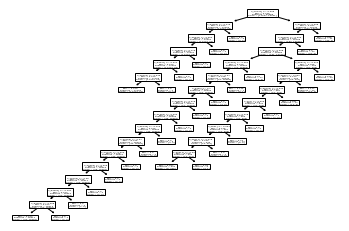

In [65]:
tree.plot_tree(best_clf_dt)

# Gradient Boosting Classifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
GB = GradientBoostingClassifier(random_state=0)
GB.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [68]:
pred_gb=GB.predict(xv_test)

In [69]:
GB.score(xv_test,y_test)

0.9962566844919786

In [70]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5774
           1       0.99      1.00      1.00      5446

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [71]:
pred_gb = DT.predict(xv_test)

# print confusion matrix
cm = confusion_matrix(y_test, pred_gb)

print('Confusion matrix\n')

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix


True Positives(TP) =  5758

True Negatives(TN) =  5417

False Positives(FP) =  16

False Negatives(FN) =  29


# ROC AUC Curve

In [72]:
# computing FPR & TPR & Threshold
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, pred_gb)

In [73]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, pred_gb))

roc_auc_score for Logistic Regression:  0.9959519741070849


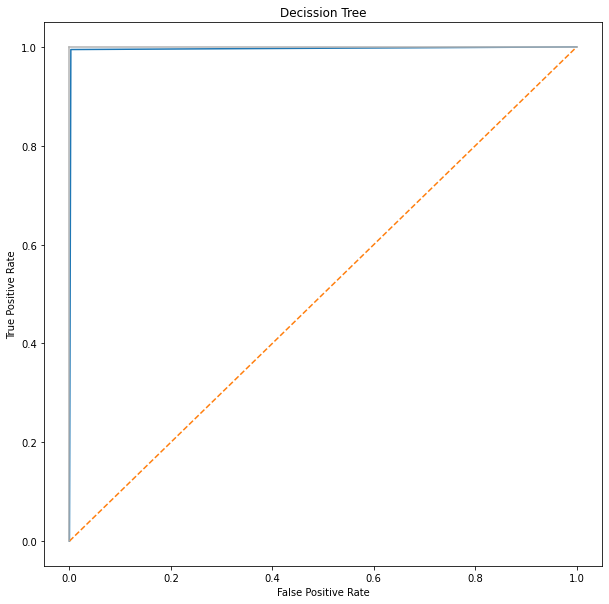

In [74]:
plt.subplots(1, figsize=(10,10))
plt.title('Decission Tree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Hyper Perameter Tuning in Gradient Boosting

In [75]:
clf_gb = GradientBoostingClassifier(max_depth=10,random_state=42,min_samples_split=20,min_samples_leaf=10)

In [76]:
best_clf_gb = clf_gb.fit(xv_train,y_train)

In [77]:
print("Accuracy of the Gradient Boosting model : {:.2f}",format(best_clf_gb.score(xv_test,y_test)))

Accuracy of the Gradient Boosting model : {:.2f} 0.9979500891265597


# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
RF=RandomForestClassifier(random_state=0)
RF.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [80]:
pred_rf=RF.predict(xv_test)

In [81]:
RF.score(xv_test,y_test)

0.9918894830659537

In [82]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5774
           1       0.99      0.99      0.99      5446

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [83]:


# print confusion matrix
cm = confusion_matrix(y_test, pred_rf)

print('Confusion matrix\n')

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix


True Positives(TP) =  5739

True Negatives(TN) =  5390

False Positives(FP) =  35

False Negatives(FN) =  56


# ROC AUC Curve

In [84]:
# computing FPR & TPR & Threshold
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, pred_rf)

In [85]:
print('roc_auc_score for random forest: ', roc_auc_score(y_test, pred_rf))

roc_auc_score for random forest:  0.9918277839762145


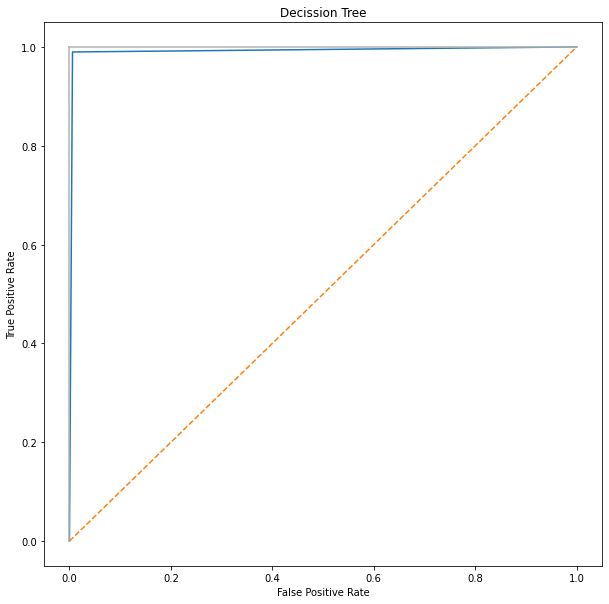

In [86]:
plt.subplots(1, figsize=(10,10))
plt.title('Decission Tree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Hyper perameter tuning random foest

In [94]:
clf_rf=RandomForestClassifier(random_state=42, n_jobs=-1)

In [95]:
best_clf_rf = clf_rf.fit(xv_train,y_train)

In [96]:
print("Accuracy of the Random Forest model : {:.2f}",format(best_clf_rf.score(xv_test,y_test)))

Accuracy of the Random Forest model : {:.2f} 0.9905525846702318


# Testing

In [90]:
def output_label(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"
    

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"]=new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    
    
    return print("\n\nLR Prediction: {} \nDT prediction: {} \nGb Prediction: {} \nRF Prediction: {}".format(output_label(pred_LR[0]),output_label(pred_DT[0]),output_label(pred_GB[0]),output_label(pred_RF[0])))



#     return print("\n\nLR Prediction: {} \nDT prediction: {} \nGb Prediction: {} \nRF Prediction: {}".format(output_label(pipe_lr[0])))

In [91]:
news = str(input())
manual_testing(news)

#Senthil Balaji case News Live: Supreme Court today refused to interfere with proceedings related to shifting the TN Minister to a private hospital. It has requested Madras High Court to proceed with the case. The apex court has listed the matter for July 4, reported Times Now  The Enforcement Directorate, on Monday, moved the SC against an order of the Madras HC allowing Balaji to be moved to a private hospital in Chennai from the government hospital following his arrest by the ED.  The ED had arrested Balaji in connection with an Enforcement Case Information Register (ECIR) filed under the Prevention of Money Laundering Act in 2021.  The ECIR was registered on the basis of three FIRs booked against him by the local police in 2018 for his alleged involvement in a cash-for-job case when he was the Transport Minister in Jayalalithaa's Cabinet in 2015.  The charges date back to his tenure as transport minister during the All India Anna Dravida Munnetra Kazhagam (AIADMK) government from 2011 to 2015.


Senthil Balaji case News Live: Supreme Court today refused to interfere with proceedings related to shifting the TN Minister to a private hospital. It has requested Madras High Court to proceed with the case. The apex court has listed the matter for July 4, reported Times Now  The Enforcement Directorate, on Monday, moved the SC against an order of the Madras HC allowing Balaji to be moved to a private hospital in Chennai from the government hospital following his arrest by the ED.  The ED had arrested Balaji in connection with an Enforcement Case Information Register (ECIR) filed under the Prevention of Money Laundering Act in 2021.  The ECIR was registered on the basis of three FIRs booked against him by the local police in 2018 for his alleged involvement in a cash-for-job case when he was the Transport Minister in Jayalalithaa's Cabinet in 2015.  The charges date back to his tenure as transport minister during the All India Anna Dravida Munnetra Kazhagam (AIADMK) government from 20

In [92]:
news = str(input())
manual_testing(news)

#One of Russia's most prominent opposition figures, Ilya Yashin, has been jailed for eight-and-a-half years for spreading "fake news" about the country's military.  One of few Kremlin critics to stay in Russia after it invaded Ukraine, Yashin continued to speak out against the war.  He was arrested after he condemned suspected Russian war crimes in the Ukrainian town of Bucha.  Soon after the invasion, Russia made reporting "false information" a crime.  Several Russians have since been given jail terms, but Yashin's sentence is the longest so far.

One of Russia's most prominent opposition figures, Ilya Yashin, has been jailed for eight-and-a-half years for spreading "fake news" about the country's military.  One of few Kremlin critics to stay in Russia after it invaded Ukraine, Yashin continued to speak out against the war.  He was arrested after he condemned suspected Russian war crimes in the Ukrainian town of Bucha.  Soon after the invasion, Russia made reporting "false information" a crime.  Several Russians have since been given jail terms, but Yashin's sentence is the longest so far.


LR Prediction: Fake News 
DT prediction: Fake News 
Gb Prediction: Fake News 
RF Prediction: Fake News


# FINAL TABLE

| Model Name | Accuracy | Accuracy After Tuning |
| :- | -: | :-: |
| Logistic Regression | 98.7 | 99.6 |
| Decision Tree | 99.5 | 99.5 |
| Gradient Boosting | 99.5 | 99.5 |
| Random Forest | 99.0 | 99.1 |